In [1]:
# Import the libraries we need for this lab

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [3]:
#Install PyTorch
!pip install http://download.pytorch.org/whl/cpu/torch-0.4.1-cp35-cp35m-linux_x86_64.whl
#Install torchvision
!pip install torchvision

# Import PyTorch library

import torch
torch.manual_seed(1)

ERROR: torch-0.4.1-cp35-cp35m-linux_x86_64.whl is not a supported wheel on this platform.
     |████████████████████████████████| 4.0MB 5.2MB/s eta 0:00:01
     |████████████████████████████████| 753.4MB 38kB/s s eta 0:00:01██▏                         | 146.4MB 55.7MB/s eta 0:00:11�██████████          | 519.5MB 5.6MB/s eta 0:00:42MB 7.9MB/s eta 0:00:20    |█████████████████████████▌      | 601.3MB 7.9MB/s eta 0:00:20�█████▌      | 601.6MB 7.9MB/s eta 0:00:20��███████████████████▎    | 641.0MB 16.1MB/s eta 0:00:07     |████████████████████████████    | 658.9MB 16.1MB/s eta 0:00:06| 674.1MB 16.7MB/s eta 0:00:05█████████▌  | 694.9MB 5.7MB/s eta 0:00:11     |██████████████████████████████  | 707.2MB 5.7MB/s eta 0:00:09��██████████████████████████▍ | 714.4MB 9.8MB/s eta 0:00:04█████████████████████ | 729.3MB 9.8MB/s eta 0:00:0356.4MB/s eta 0:00:01��███████████████▎| 735.4MB 56.4MB/s eta 0:00:017MB 56.4MB/s eta 0:00:01��███████████████▌| 740.5MB 56.4MB/s eta 0:00:01��███████████████▋| 743.1M

In [13]:
# Import libraries

from torch.utils.data import Dataset, DataLoader

In [4]:
# Generate the data with noise and the line

X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = 1 * X - 1
Y = f + 0.1 * torch.randn(X.size())

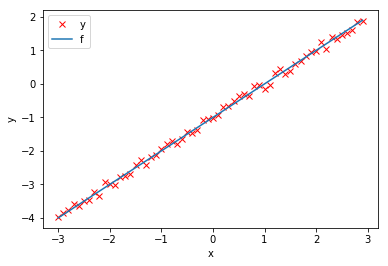

In [6]:

plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'y')
plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [7]:
# Define the prediction function

def forward(x):
    return w * x + b

In [8]:
# Define the cost function

def criterion(yhat, y):
    return torch.mean((yhat - y) ** 2)

In [15]:
# Create class Data

class Data(Dataset):
    
    # Constructor
    def __init__(self):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.y = 1 * X - 1
        self.len = self.x.shape[0]
        
    # Getter
    def __getitem__(self, index):    
        return self.x[index], self.y[index]
    
    # Get length
    def __len__(self):
        return self.len

<Figure size 432x288 with 0 Axes>

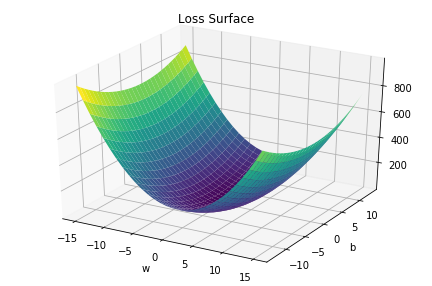

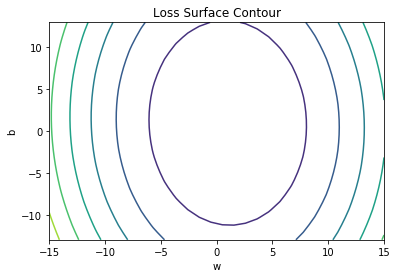

In [16]:
# The class for plotting the diagrams

class plot_error_surfaces(object):
    
    # Constructor
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)    
        Z = np.zeros((30, 30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y - w2 * self.x + b2) ** 2)
                count2 += 1
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize = (7.5, 5))
            plt.axes(projection = '3d').plot_surface(self.w, self.b, self.Z, rstride = 1, cstride = 1, cmap = 'viridis', edgecolor = 'none')
            plt.title('Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()
            
     # Setter
    def set_para_loss(self, W, B, loss):
        self.n = self.n + 1
        self.W.append(W)
        self.B.append(B)
        self.LOSS.append(loss)
    
    # Plot diagram
    def final_plot(self): 
        ax = plt.axes(projection = '3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W, self.B, self.LOSS, c = 'r', marker = 'x', s = 200, alpha = 1)
        plt.figure()
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()
    
    # Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim()
        plt.plot(self.x, self.y, 'ro', label = "training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label = "estimated line")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Data Space Iteration: '+ str(self.n))
        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.title('Loss Surface Contour')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

# Create a plot_error_surfaces object.

get_surface = plot_error_surfaces(15, 13, X, Y, 30)

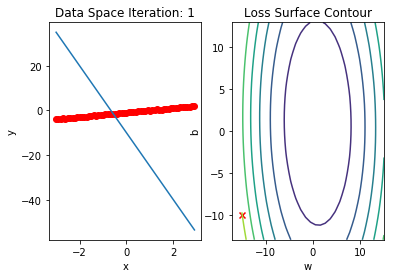

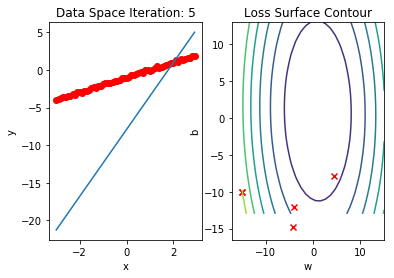

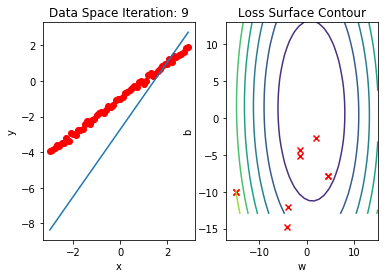

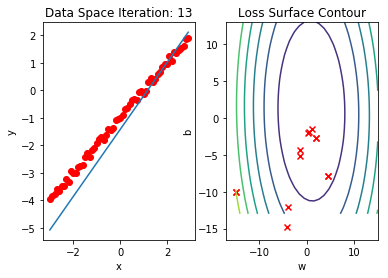

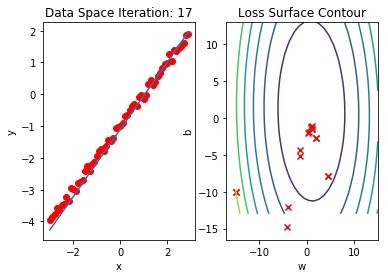

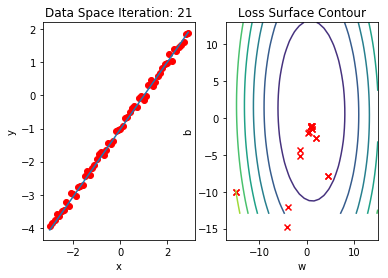

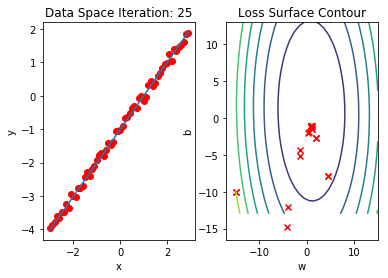

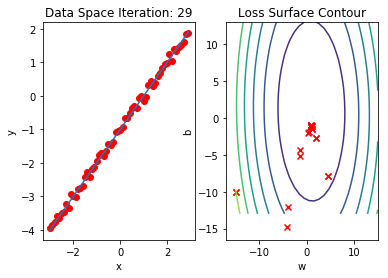

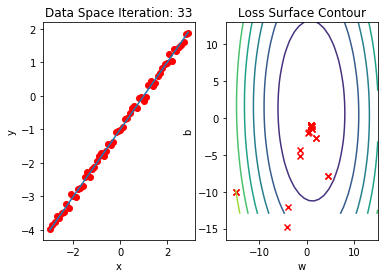

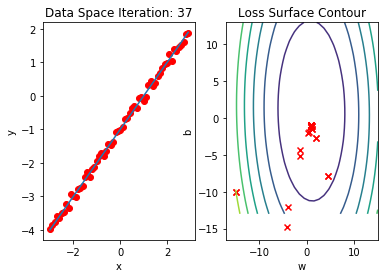

In [17]:
# Practice: Perform mini batch gradient descent with a batch size of 20.

dataset = Data()
trainloader = DataLoader(dataset = dataset, batch_size = 20)
w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)
LOSS_MINI20 = []
lr = 0.1

def my_train_model(epochs):
    for epoch in range(epochs):
        yhat = forward(X)
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), criterion(yhat, Y).tolist())
        get_surface.plot_ps()
        LOSS_MINI20.append(criterion(forward(X), Y).tolist())
        for x,y in trainloader:
            yhat = forward(x)
            loss = criterion(yhat, y)
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
            loss.backward()
            w.data = w.data - lr*w.grad.data
            b.data = b.data - lr*b.grad.data
            w.grad.data.zero_()
            b.grad.data.zero_()

my_train_model(10)
        

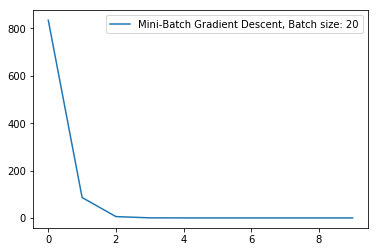

In [19]:
# Practice: Plot a graph to show all the LOSS functions

# Type your code here
plt.plot(LOSS_MINI20,label = "Mini-Batch Gradient Descent, Batch size: 20")
plt.legend()